<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/Regression-space_shuttle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the number of distressed O-rings for space shuttles

Please keep in mind that the number of data samples is very low for this example.

In [1]:
# Case scenario:
# On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. 
# Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all 
# seven crew members on board. An investigation into the cause of the disaster focused on a critical # seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may # be related to the ambient temperature during the launch. The table below summarizes observational # data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at
# the time of the launch.
#
# The goal is to predict the number of O-rings that will experience thermal distress for a given 
# flight when the launch temperature is below freezing.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# function definition to save the figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    file = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# import pandas to import the dataset
import pandas as pd
# import the dataset

def load_o_ring_data():
    # a way to save the name of the file as a string
    csv_file =  'o-ring-erosion-only.data'
    # The separator in this dataset is given by a space instad of ','
    data = pd.read_csv(csv_file, sep = ' '); df = pd.DataFrame(data)
    return df

In [3]:
# call of function to load the dataset and display it
o_ring = load_o_ring_data(); o_ring.head()

,O_rings,O_rings_thermal_distress,Launch_Temperature,Leak_Check_Pressure,Nr_of_Flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [4]:
# we can also observe some information about the data
o_ring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   O_rings                   23 non-null     int64
 1   O_rings_thermal_distress  23 non-null     int64
 2   Launch_Temperature        23 non-null     int64
 3   Leak_Check_Pressure       23 non-null     int64
 4   Nr_of_Flight              23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB


In [5]:
# we count the number of time the values in O_rings_thermal_distress are repeated
o_ring["O_rings_thermal_distress"].value_counts()

0    17
1     5
2     1
Name: O_rings_thermal_distress, dtype: int64

In [ ]:
# This is in case you want to show also some statistics of the data 
o_ring.describe()

,O_rings,O_rings_thermal_distress,Launch_Temperature,Leak_Check_Pressure,Nr_of_Flight
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.304348,69.565217,152.173913,12.00000
std,0.0,0.558796,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,0.500000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


Saving figure histograms


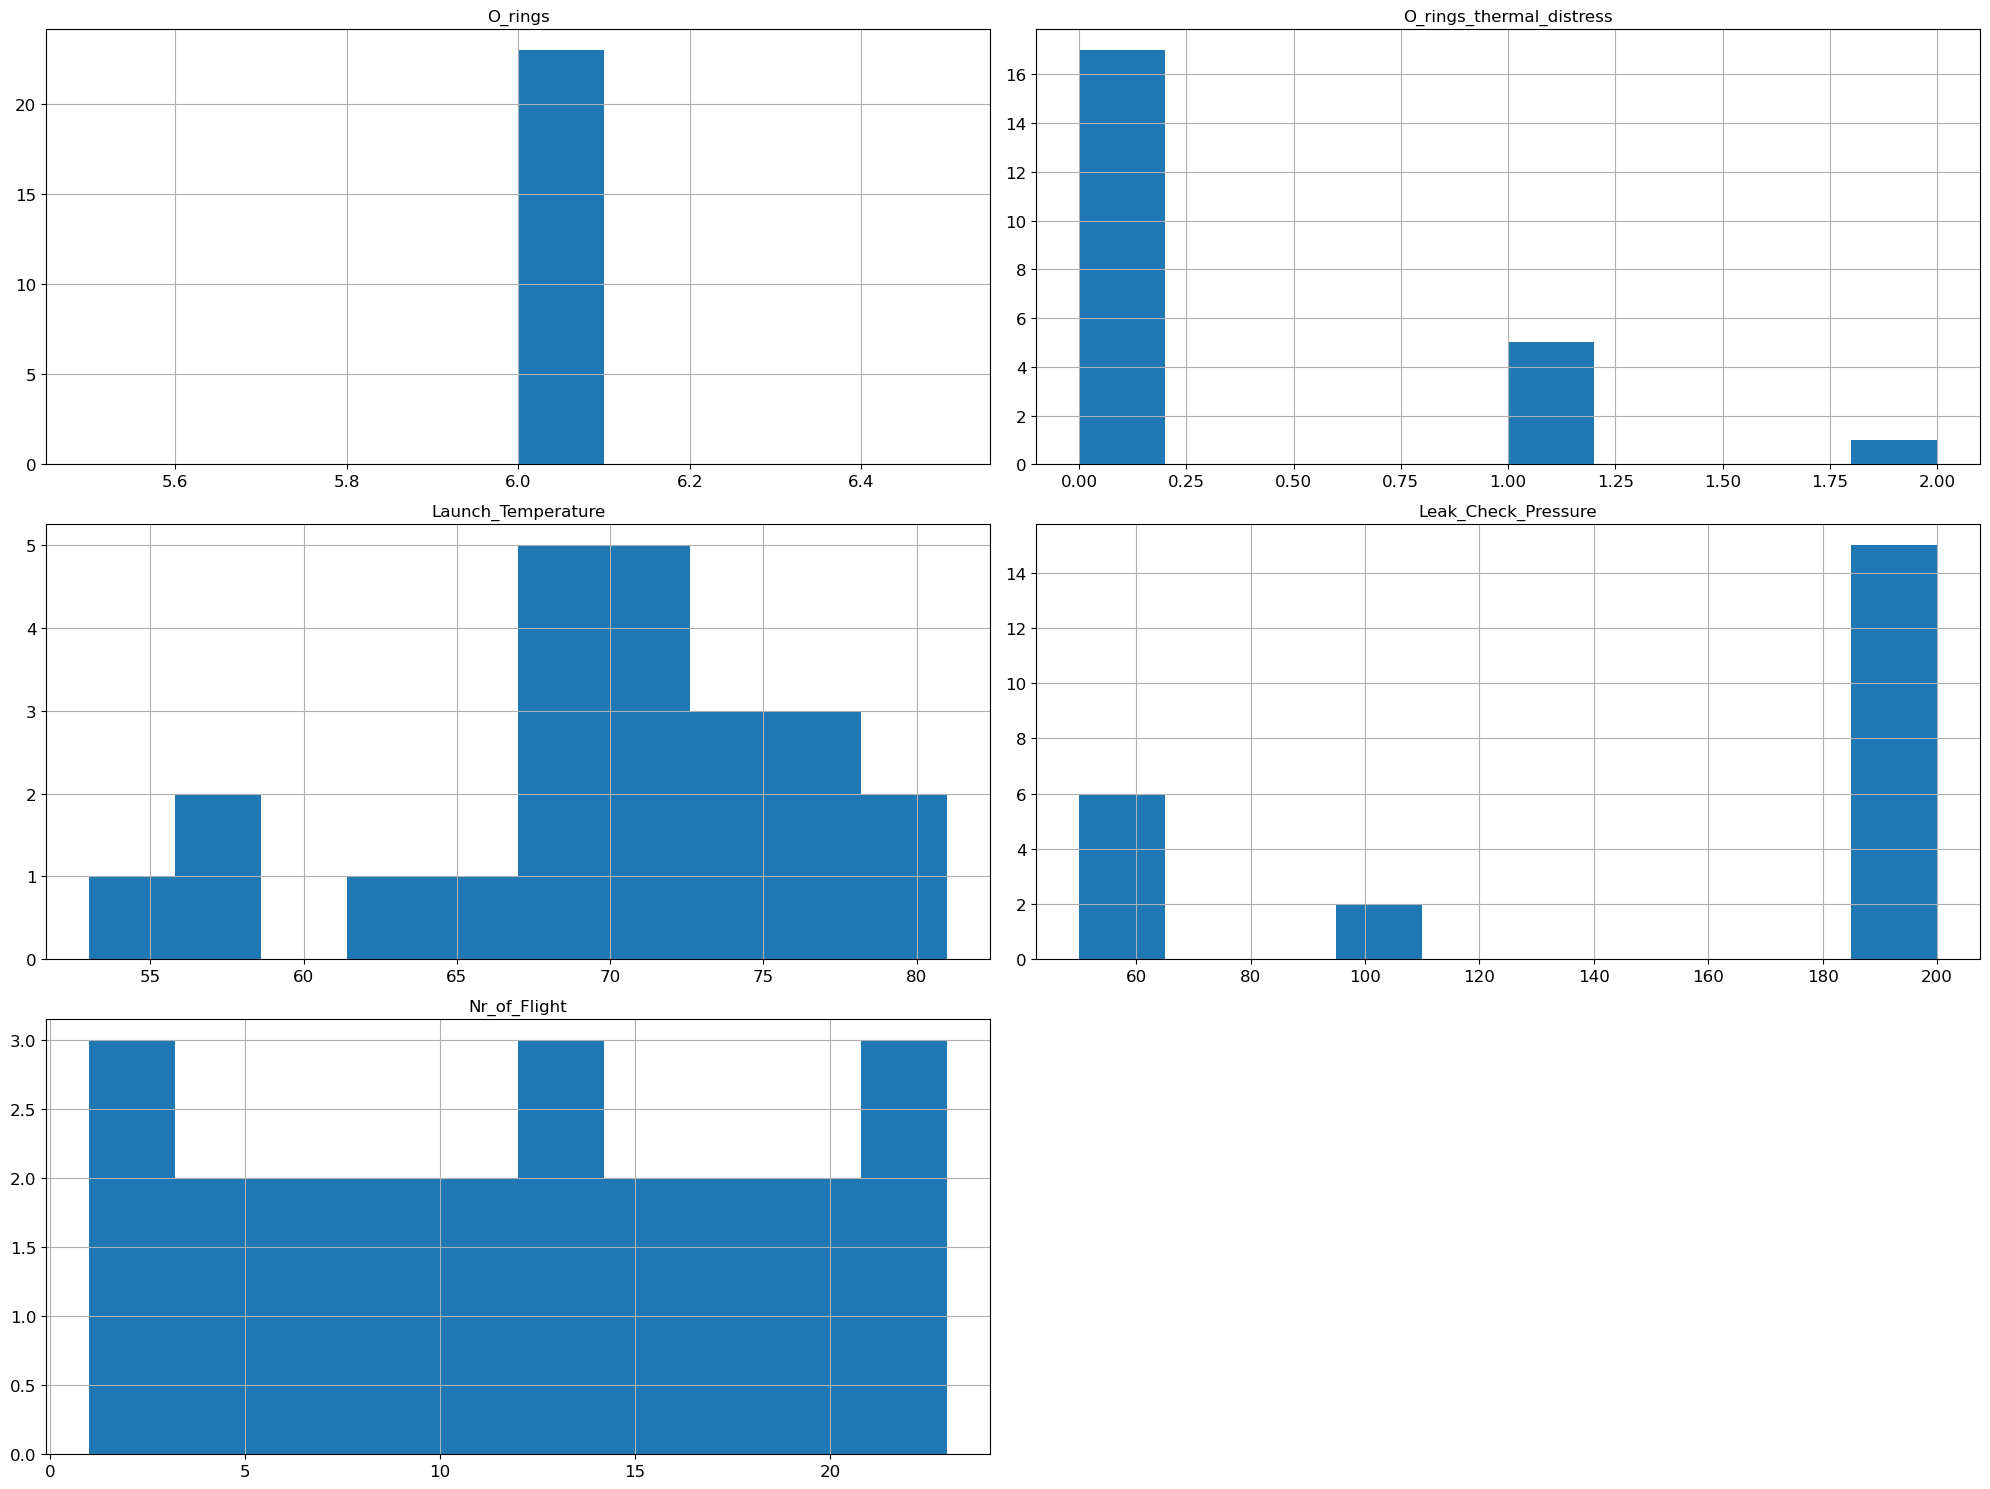

In [ ]:
# We want to dsiplay the values of the dataset
# Display the plots in line
%matplotlib inline
import matplotlib.pyplot as plt
o_ring.hist(bins=10, figsize=(20,15))
save_fig('histograms')
plt.show()

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and test set.
train_set, test_set = train_test_split(o_ring, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,O_rings,O_rings_thermal_distress,Launch_Temperature,Leak_Check_Pressure,Nr_of_Flight
15,6,0,75,200,16
9,6,1,63,200,10
0,6,0,66,50,1
8,6,1,57,200,9
17,6,0,81,200,18


In [ ]:
# To "filter" the dataset and create the one needed for the training
# drop the labels for training set to create the input training set
o_ring = train_set.drop("O_rings_thermal_distress", axis=1) 
o_ring = o_ring.drop("Nr_of_Flight", axis=1)
# The label for the training is characterised by the column with the
# "O_rings_thermal_distress"
o_ring_labels = train_set["O_rings_thermal_distress"].copy()

In [ ]:
train_set.head()

,O_rings,O_rings_thermal_distress,Launch_Temperature,Leak_Check_Pressure,Nr_of_Flight
12,6,0,67,200,13
1,6,1,70,50,2
13,6,2,53,200,14
5,6,0,72,50,6
2,6,0,69,50,3


In [ ]:
o_ring.head()

,O_rings,Launch_Temperature,Leak_Check_Pressure
12,6,67,200
1,6,70,50
13,6,53,200
5,6,72,50
2,6,69,50


In [ ]:
o_ring_labels.head()

12    0
1     1
13    2
5     0
2     0
Name: O_rings_thermal_distress, dtype: int64

In [ ]:
# To prepare the data it is possible to use a Pipeline
# I leave to you to look into the information about Pipelines and Transformers.
# Here some suggestions: https://www.databricks.com/glossary/what-are-ml-pipelines
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
print(num_pipeline)

Pipeline(steps=[('std_scaler', StandardScaler())])


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:

num_attribs = list(o_ring)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

o_ring_prepared = full_pipeline.fit_transform(o_ring)

In [ ]:
o_ring_prepared

array([[ 0.        , -0.45684395,  0.78023648],
       [ 0.        ,  0.01757092, -1.43727773],
       [ 0.        , -2.67077999,  0.78023648],
       [ 0.        ,  0.3338475 , -1.43727773],
       [ 0.        , -0.14056737, -1.43727773],
       [ 0.        ,  1.28267723,  0.78023648],
       [ 0.        ,  0.80826237,  0.78023648],
       [ 0.        , -0.29870566, -1.43727773],
       [ 0.        , -0.45684395, -1.43727773],
       [ 0.        ,  0.96640065,  0.78023648],
       [ 0.        ,  0.01757092,  0.78023648],
       [ 0.        ,  0.96640065,  0.78023648],
       [ 0.        , -1.88008855,  0.78023648],
       [ 0.        ,  0.01757092, -0.69810633],
       [ 0.        ,  0.01757092,  0.78023648],
       [ 0.        , -0.45684395,  0.78023648],
       [ 0.        ,  1.44081552,  0.78023648],
       [ 0.        ,  0.49198579, -0.69810633]])

In [ ]:
# Here diverse types of regressive models are used: Support Vector Machines, Random Forests 
# and Linear Regressors

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#reg = RandomForestRegressor(n_estimators=10, random_state=42)
reg = SVR(kernel="linear")
#reg = LinearRegression()

# The fit function trains the regressor (the model)
reg.fit(o_ring_prepared, o_ring_labels)

SVR(kernel='linear')

In [ ]:

some_data = o_ring.iloc[:5]
some_labels = o_ring_labels.iloc[:5]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))

Predictions: [ 0.45255248 -0.00115266  1.14909444 -0.10065866  0.04860033]


In [ ]:

print("Labels:", list(some_labels))

Labels: [0, 1, 2, 0, 0]


In [ ]:
from sklearn.metrics import mean_squared_error
# some metrics used to evaluate the error in the prediction
o_ring_predictions = reg.predict(o_ring_prepared)
mse = mean_squared_error(o_ring_labels, o_ring_predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.3952992511413112


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(o_ring_labels, o_ring_predictions)
print("MAE:", mae)

MAE: 0.2613947146090829


# Cross validation on the training set - a better way of validation

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(reg, o_ring_prepared, o_ring_labels,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
display_scores(rmse_scores)

Scores: [0.84374494 1.07778895 0.07539087 0.07951209 0.10623842 0.24941339
 0.45167518 0.58834101 0.14974239 0.0489296 ]
Mean: 0.36707768343348973
Standard deviation: 0.34446282287646957


## Examination of the role of the temperature

<AxesSubplot:xlabel='Launch_Temperature', ylabel='O_rings_thermal_distress'>

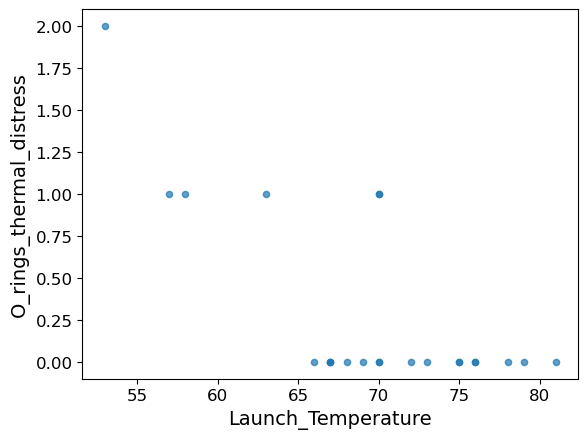

In [ ]:
# plot of the results 
pd.concat([train_set, test_set]).plot(kind="scatter", x="Launch_Temperature", y="O_rings_thermal_distress", alpha=0.7)